# Coin detector using OpenCV 
### a. Detects the number of coins in the image
### b. Labels the coins with serial numbers
### c. Draws a vertical line in between coins 

### Import libraries

In [234]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import itertools

%matplotlib inline

### Input current directory location

In [235]:
input_image = '/home/suj/Desktop/coin_detector/test_input/test3.jpg'
outpt_image = '/home/suj/Desktop/coin_detector/test_output/test.jpg'

### Preprocess input image using OpenCV

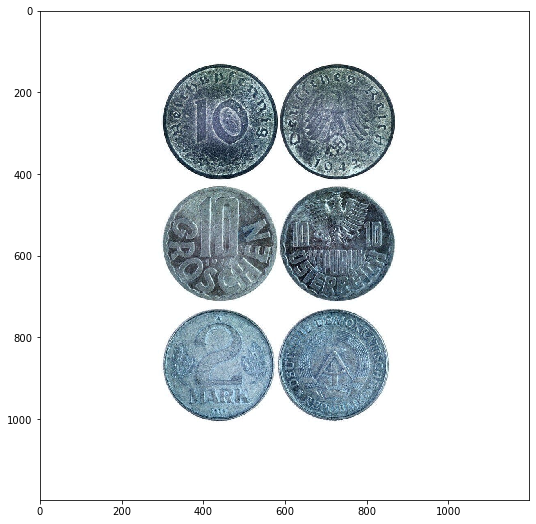

In [236]:
img = cv2.imread(input_image, cv2.IMREAD_COLOR)
img_orig = img.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_blur = cv2.GaussianBlur(gray,(21,21), cv2.BORDER_DEFAULT)
plt.rcParams["figure.figsize"] = (16,9)
plt.imshow(img_orig)

### Apply Hough Transformation

In [237]:
# Apply hough circles transformation
circles = cv2.HoughCircles(gray_blur, cv2.HOUGH_GRADIENT, 0.9, 120, param1=50, param2=30, minRadius=60, maxRadius=140)
circles_rounded = np.uint16(np.around(circles))
img = circles_rounded.reshape((circles_rounded.shape[1],circles_rounded.shape[2]))

# Sort 2D numpy array by 2nd Column
columnIndex = 0
img_sort = img[img[:,columnIndex].argsort()]

In [238]:
# Create seperate columns for X, Y locations with radius of circle
x = np.array(img_sort)[:,0]
y = np.array(img_sort)[:,1]
r = np.array(img_sort)[:,2]

In [239]:
# Pre-process x , y , r values for mean value calculation
add_x = np.add(x,r)
add_y = np.add(y,r)
sub_x = np.subtract(x,r)
sub_y = np.subtract(y,r)

In [240]:
# Calculate the mean values between the coins 

# Intialise lists and variables
a = [add_x]
check_x = []
check_add = []
check_sub = []
x_points = []        
l = [i for i in range(len(a[0]))]

# Loop to calculate the mean between the next coin
for i, j in itertools.product(add_x, l):
    x = ((int(a[0][j])-int(i)))
    y = add_x[j]
    z = sub_x[j]
    check_x.append(x)
    check_add.append(y)
    check_sub.append(z)

# Conversion of negatives if any
positive = [-x if x<0 else x for x in check_x]

# Loop to avoid values within the avoidable range (default value = 50)
for num, value in enumerate(positive):
    if value==0:
        zero_in = num
        zero_plus = zero_in + 1
        if zero_plus<=len(positive)-1:
            if positive[zero_plus]>50:
                ad = check_add[zero_plus]
                sub = check_sub[zero_in]
                mean = (ad+sub)/2
                x_points.append(mean)
print(x_points)

[576.5]


### Draw & Label the Coins

In [241]:
count = 1 
for i in circles_rounded[0, :]:
    cv2.circle(img_orig,(i[0],i[1]),i[2],(0,255,0),3)
    cv2.circle(img_orig,(i[0],i[1]),2,(0,255,0),2)
    cv2.putText(img_orig, "Coin" + str(count), (i[0]-70,i[1]+30), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0,255,0), 2)
    count +=1

### Draw the Lines for calculated mean values

In [242]:
image = img_orig
for i in x_points:
    start_point = (int(i),max(add_y))
    end_point = (int(i), min(sub_y))  
    img = cv2.line(image, start_point, end_point, (0, 0, 255) , 2)
    
# Save the Output image into desired folder
cv2.imwrite(outpt_image, img)  

True

### Output !!!

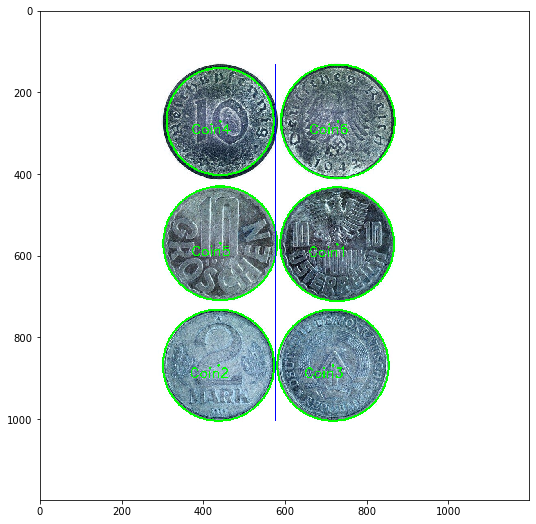

In [243]:
plt.rcParams["figure.figsize"] = (16,9)
plt.imshow(img_orig)